# Correlations between datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D      
from scipy import stats  

#### Import all data
ms_data = dataframe with normalised intensites : samples x molecules

using first replicate

In [2]:
# ms data
data = pd.read_csv('data/cas_intensities.csv', delimiter=',', index_col = 0)
# only use first repliate
data = data[data["replicate"]==1]
ms_data_original = data.drop(columns=["replicate"])

In [3]:
'''data_dist = ms_data.copy()
data_dist["sum"] = data_dist.apply(lambda row:row.sum(), axis=1)
data_dist['median']= data_dist.apply(lambda row:row[:-1].median(), axis=1)
data_dist['mean']= data_dist.apply(lambda row:row[:-2].mean(), axis=1)
data_norm = data_dist.apply(lambda row: row[:-3]/row['mean'],axis=1)
data_norm.index = data_dist.index
data_norm2 = data_norm.apply(lambda col:col/col.median(),axis=0)'''

'data_dist = ms_data.copy()\ndata_dist["sum"] = data_dist.apply(lambda row:row.sum(), axis=1)\ndata_dist[\'median\']= data_dist.apply(lambda row:row[:-1].median(), axis=1)\ndata_dist[\'mean\']= data_dist.apply(lambda row:row[:-2].mean(), axis=1)\ndata_norm = data_dist.apply(lambda row: row[:-3]/row[\'mean\'],axis=1)\ndata_norm.index = data_dist.index\ndata_norm2 = data_norm.apply(lambda col:col/col.median(),axis=0)'

In [4]:
ms_data = ms_data_original.copy()
ms_data = stats.zscore(np.log(ms_data))

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


panelist_data_df = dataframe with panelist data : samples x flavors

using values from 1. panelist

In [5]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

show distribution of each flavor in the panelist data

In [6]:
flavors = ['Floral','Fruity','Woody','Complexity','Malt','Sweet','Peaty','Dried_fruits','Aftertaste']

##### distribution of flavor in panelist data

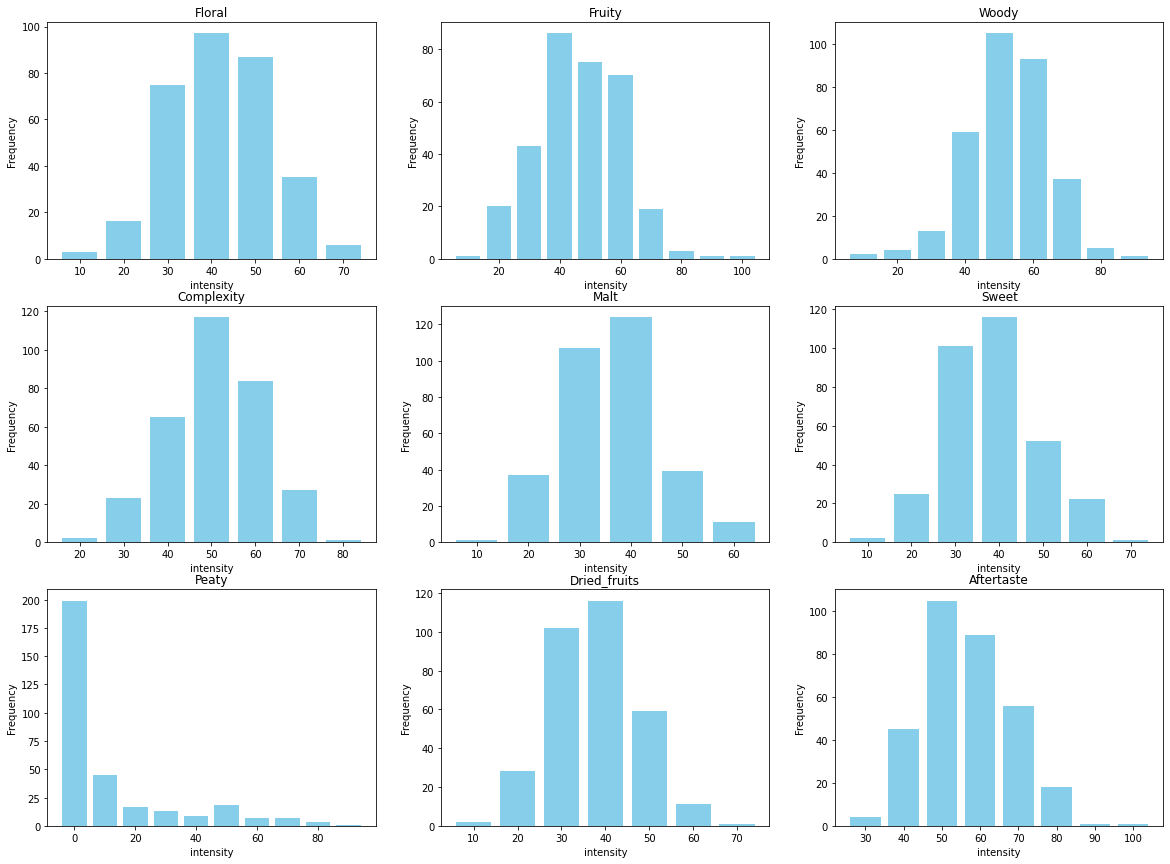

In [7]:
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts = panelist_data_df[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts.index, counts.values, color='skyblue',width=8)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)#
plt.show()


### 1. Correlation between one flavor and ms data

ms_data_comp = df of ms data containing only comparable samples


panelist_data_comp = df of panelist data containing only comparable samples

In [8]:
# get only comparable samplekeys = 197 samples
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]
ms_data_comp = ms_data.loc[valid_indexes]
panelist_data_comp = panelist_data_df.loc[valid_indexes]

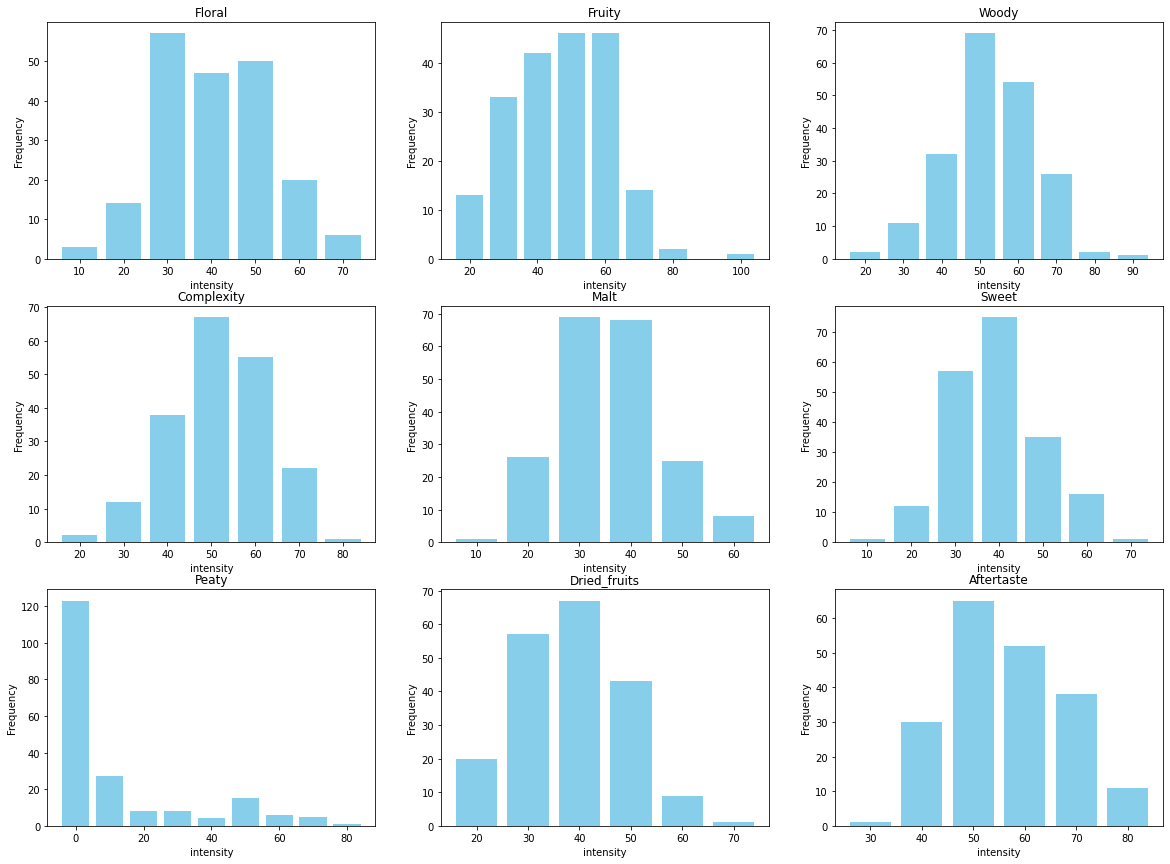

In [9]:
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts = panelist_data_comp[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts.index, counts.values, color='skyblue',width=8)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)#
plt.show()


### Find all descriptors for each flavor: Sweet, Fruity, Woody, Malt

In [10]:
# find CAS number to each molecule
CAS_to_mol = pd.read_table("data/CAS_mol_OD.csv", delimiter=',',  names= ["CAS","intensity", "odor"])
CAS_to_mol=CAS_to_mol.drop(columns=["intensity","odor"])
CAS_to_mol= CAS_to_mol.drop_duplicates()
CAS_to_mol

,CAS
(-)-carvone,6485-40-1
(-)-cis-rose oxide,3033-23-6
(-)-cubenol,21284-22-0
(-)-nootkatone,38427-78-0
(-)-β-bisabolene,495-61-4
...,...
δ-dodecalactone,713-95-1
δ-elemene,20307-84-0
δ-muurolene,120021-96-7
δ-terpinene,586-62-9


sweet_descriptors =  all molecules that where labeled as sweet in flavornet

In [11]:
# all molecules that where labeled as sweet in flavornet
sweet_descriptors = ["benzyl alcohol","ethyl phenylacetate","tridecanal","nerol","methyl hexanoate","linalyl isovalerate","undecanaldehyde","caryophyllene oxide","linalyl acetate","safranal","uncineol","phenylethanal","p-anisaldehyde","eudesmol","ethylmethyl pyrazine","citronellyl butyrate","4-methyl-3-penten-2-one","nonyl acetate","10-epi-γ-eudesmol","β-bisabolol","(Z)-6-dodecene-γ-lactone","β-farnesene","2-dodecenal","γ-dodecalactone","epoxy-β-ionone","2-undecenal","styrene glycol","methyl furaneol","(-)-cis-rose oxide","(E)-β-ocimene","dimethylmethoxyfuranone","1,8-cineole","ethylbenzaldehyde","2-pentylthiophene","α-farnesene","methionol","7-methoxycoumarin","(Z)-3-hexenyl-2-methylbutanoate","o-aminoacetophenone","viridiflorol","isopiperitone","β-sinensal","ethyl vanillate","methyl butanoate","p-methoxystyrene","ethanol","6-Methoxyeugenol","4-hexanolide","δ-dodecalactone","sesquiphellandrene","diethyl malate","linalyl butyrate","guaiacol","coumarin","methyl benzoate","isopropyl benzoate","safrole","durene","γ-butyrolactone","ethyl isobutyrate","furfural"]
fruit_descriptors = ["ethyl phenylacetate", "geranyl valerate", "γ-heptalactone", "ethyl propionate", "diethyl acetal", "geranyl butyrate", "ethyl heptylate", "ethyl octanoate", "methyl hexanoate", "dimethylheptenal", "pentanone", "ethyl 3-methylbutanoate", "geranyl isovalerate", "isobutyl acetate", "ethoxypropanol", "methyl-2-butenal", "methylnonanedione", "linalyl acetate", "methyl geranate", "limonene oxide", "hydrocinnamic alcohol", "diethyl succinate", "ethyl hexanoate", "ethylmethyl pyrazine", "β-cubebene", "neryl acetate", "citronellyl butyrate", "hexyl acetate", "nonyl acetate", "butyl methylbutyrate", "pentenal", "isopentyldimethylpyrazine", "p-menth-1-en-9-ol", "hexadecanone", "octyl acetate", "γ-dodecalactone", "epoxy-β-ionone", "ethyl octenoate", "ethyl isohexanoate", "isobornyl propionate", "cedrenol", "p-menth-1-en-9-yl acetate", "cadinadiene", "(Z)-3-hexenyl hexanoate", "ethyl cyclohexanoate", "4-methylthio-2-butanone", "3,5-octadienone", "methyl cyclohexanecarboxylate", "2-pentylthiophene", "α-ocimene", "butanediol", "ethyl valerate", "pentanol", "isopiperitone", "butyl octanoate", "ethyl vanillate", "methyl butanoate", "2-methylbutyl acetate", "propyl hexanoate", "butyl hexanoate", "isopropyl butanoate", "spathulenol", "butanol", "δ-dodecalactone", "methyl quinoxaline", "sesquiphellandrene", "2-hexenol", "ethyl benzoate", "isopropyl benzoate", "ethyl lactate", "citronellyl isobutyrate"]
wood_descriptors = ["α-muurolene","cadina-1,4-dien-3-ol","isocaryophyllene","eudesmol","α-ionone","bornyl butyrate","(E)-α-bergamotene","linalool oxide","ethyl pyrazine","10-epi-γ-eudesmol","germacrene B","trans-sabinene hydrate","dihydrolinalool","isodihydrocarveol","β-farnesene","β-sesquiphellandrene","δ-elemene","α-calacorene","epoxy-β-ionone","germacrene D","bicyclogermacrene","alloaromadendrene","α-thujene","oxo-β-ionone","(-)-γ-elemene","γ-muurolene","sabinene","α-guaiene","α-copaene","γ-cadinene","nerolidol","β-eudesmol","α-cadinol","δ-cadinene","dill apiol","aromadendrene","α-gurjunene","guaiol","α-farnesene","γ-selinene","cuminica lcohol","perillen","elemol","α-humulene","β-caryophyllene","β-guaiene"]
malt_descriptors = ["pentanal","3-methyl-1-butanol","2-methyl-1-butanol","methylbutanal","isobutyraldehyde"]

In [151]:
violin_df = pd.DataFrame.copy(ms_data_comp)

In [152]:
def add_category(descriptors, flavor, under_bond,upper_bond):
    descriptors_CAS = [CAS_to_mol.loc[index]['CAS'] for index in descriptors if index in CAS_to_mol.index]
    sample_ids = panelist_data_comp[panelist_data_comp[flavor]>= upper_bond].index
    true_sample_ids = panelist_data_comp[panelist_data_comp[flavor]>= upper_bond].index
    false_sample_ids = panelist_data_comp[panelist_data_comp[flavor]<= under_bond].index
    violin_df["category_" + str(flavor)]= list((pd.Series(violin_df.index)).apply((lambda x: 1 if x in true_sample_ids else (-1 if x in false_sample_ids else 0))))

In [153]:
print(panelist_data_comp['Sweet'].median())
print(panelist_data_comp['Fruity'].median())
print(panelist_data_comp['Woody'].median())
print(panelist_data_comp['Malt'].median())


40.0
50.0
50.0
40.0


In [154]:
add_category(sweet_descriptors, "Sweet", 20,50)
add_category(fruit_descriptors, "Fruity",30,70)
add_category(wood_descriptors, "Woody",40,70)
add_category(malt_descriptors,"Malt", 20,50 )

In [155]:
# find cas numbers for these molecules
sweet_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"]for index in sweet_descriptors if index in CAS_to_mol.index ]
fruit_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in fruit_descriptors if index in CAS_to_mol.index]
wood_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in wood_descriptors if index in CAS_to_mol.index]
malt_descriptors_CAS  =[CAS_to_mol.loc[index]["CAS"] for index in malt_descriptors if index in CAS_to_mol.index]

violin_df = containing all CAS numbers and comparable samples plus their category meaning if the sample was categorized sweet, not sweet or average sweet regarding the panelist data

In [156]:
violin_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,category_Sweet,category_Fruity,category_Woody,category_Malt
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,0.910838,0.573929,-0.224044,-0.650807,-0.589009,-0.589009,0.251125,0.910838,0.910838,0.573929,...,0.907783,-0.486772,-0.589009,-0.589009,0.320761,0.135896,0,-1,0,0
000657,0.430112,0.811646,-0.592981,-0.829828,-0.821064,-0.821064,0.188285,0.430112,0.430112,0.811646,...,0.835318,-0.764395,-0.821064,-0.821064,-0.179266,-0.035157,0,0,0,0
000658,1.218257,0.646442,0.730433,0.708837,0.409066,0.409066,0.910039,1.218257,1.218257,0.646442,...,1.011988,0.479407,0.409066,0.409066,0.824612,0.552192,0,0,0,0
000838,1.144339,0.028495,1.967544,1.599012,1.153908,1.153908,-0.537531,1.144339,1.144339,0.028495,...,-1.249469,0.189098,1.153908,1.153908,1.142603,0.725897,1,1,0,0
000839,0.754606,0.020647,1.065497,0.342602,-0.467791,-0.467791,-1.615739,0.754606,0.754606,0.020647,...,-1.873113,-1.000747,-0.467791,-0.467791,-1.398980,-0.941502,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,-1.458092,-0.889636,-0.764520,-0.390571,0.189232,0.189232,-0.280624,-1.458092,-1.458092,-0.889636,...,0.392032,-0.032629,0.189232,0.189232,-0.991316,-0.697282,0,0,0,0
000926,-0.222161,-0.714303,-0.351583,-0.153399,-0.143734,-0.143734,-0.235280,-0.222161,-0.222161,-0.714303,...,0.470545,-0.373271,-0.143734,-0.143734,-0.017503,-0.536463,0,0,0,0
000927,-1.049738,-0.822612,0.013027,0.186509,0.267988,0.267988,0.185172,-1.049738,-1.049738,-0.822612,...,0.471702,0.010136,0.267988,0.267988,-0.414398,-0.564488,1,0,0,0


### Correlation over all samples

check correlation

samples which are categorised in sweet should be highly expressed in cas numbers which are labeled as sweet

function which checks if intensity over all sweet samples should be higher than intensity over not sweet or average samples 

In [157]:
'''
if the difference is > 1.5 than H0 ist true and cas is significant, meaning over all labeled samples it is highly expressed for the flavor it was labeld with 
'''
def check_CAS(df,CAS, OSA):
    # check mean of one cas number over all sweet samples is higher than mean of cas numbers over all not sweet samples
    # add entries for other OSAs in the future
    flavor_true = df[df["category_" + OSA] == 1].index
    flavor_false = df[df["category_"+ OSA] == -1].index
    mean_flavor_true = np.mean(df[CAS].loc[flavor_true])
    mean_flavor_false = np.mean(df[CAS].loc[flavor_false])
    #print("flavor_true:"+str(mean_flavor_true))
    #print("flavor_false:"+str(mean_flavor_false))
    difference=mean_flavor_true-mean_flavor_false
    return difference

#### check two example CAS numbers

2463-77-6: sweet

6485-40-1: not sweet

In [158]:
check_CAS(violin_df,'2463-77-6','Sweet')

0.10618929337441849

In [159]:
check_CAS(violin_df, '6485-40-1', 'Sweet')

-0.31906590051527095

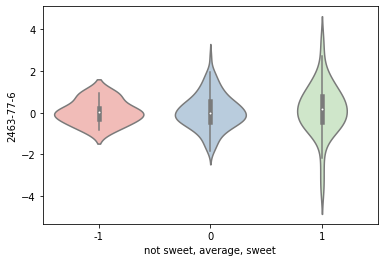

In [160]:
# looking at one specific cas number which was categories as sweet
sns.violinplot(x='category_Sweet',y= '2463-77-6', data=violin_df, palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

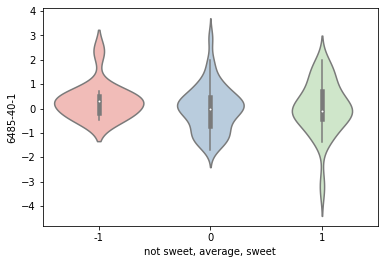

In [161]:
# looking at one specific cas number which was not categories as sweet
sns.violinplot(x='category_Sweet',y= '6485-40-1' , data=violin_df[:-1], palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

#### check labeled molecules per flavor  over all samples

looking at e.g all sweet CAS numbers and how the intensite of these change in sweet, average sweet and not sweet samples

In [162]:
def get_flavored_CAS(desc_CAS, flavor):
    # filter for CAS numbers labeled sweet
    flavor_cas_vdf = pd.DataFrame.copy(violin_df[desc_CAS] )
    flavor_cas_vdf['category_' + str(flavor)] = pd.DataFrame.copy(violin_df['category_'+ str(flavor)])
    flavor_cas_vdf["sum"]= flavor_cas_vdf.apply(lambda row:row[0:-1].sum(), axis=1)
    flavor_cas_vdf["mean"]= flavor_cas_vdf.apply(lambda row:row[0:-2].mean(), axis=1)
    flavor_cas_vdf["median"]= flavor_cas_vdf.apply(lambda row:row[0:-3].median(), axis=1)
    return(flavor_cas_vdf)

In [163]:
# create df for each flavor
sweet_cas_violin_df = get_flavored_CAS(sweet_descriptors_CAS,"Sweet")
woody_cas_violin_df = get_flavored_CAS(wood_descriptors_CAS,"Woody")
fruity_cas_violin_df = get_flavored_CAS(fruit_descriptors_CAS,"Fruity")
malt_cas_violin_df = get_flavored_CAS(malt_descriptors_CAS,"Malt")

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\

In [164]:
malt_cas_violin_df
# not enough data -> exclude from analysis

,110-62-3,123-51-3,137-32-6,590-86-3,78-84-2,category_Malt,sum,mean,median
sample_key,,,,,,,,,
000656,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000657,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000658,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000838,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000839,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
000925,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000926,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000927,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN


In [165]:
sweet_cas_violin_df_labeled = sweet_cas_violin_df.copy()
sweet_cas_violin_df_labeled['category_Sweet_label'] = sweet_cas_violin_df_labeled['category_Sweet'].replace({
    0: 'average flavor',
    1: 'flavor-specific',
    -1: 'not-flavor'
})

sweet_cas_violin_df_labeled = sweet_cas_violin_df_labeled.drop(columns=['category_Sweet'])

slope: 2.6610143689606445


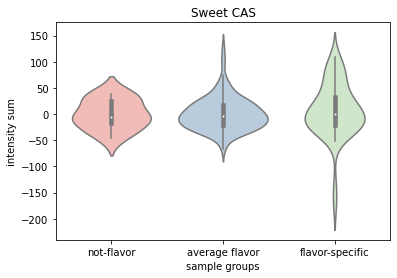

In [166]:
# looking at all cas number which were categories as sweet over all samples

sns.violinplot(x='category_Sweet_label', y='sum', data=sweet_cas_violin_df_labeled, palette="Pastel1", order=['not-flavor','average flavor', 'flavor-specific'])


# lines
medians = sweet_cas_violin_df_labeled.groupby("category_Sweet_label")["sum"].median()

x_vals = [0, len(medians)-1] 
y_vals = [medians.iloc[-1], medians.iloc[1]] 


#plt.plot(x_vals, y_vals, color='r', linestyle='--', label='Line through median of first and last violin')
#plt.plot([-0.75,2.75], [0,0], color='b', linestyle='--', label='Line through median of first and last violin')
print('slope: ' +str((y_vals[1]- y_vals[0]) / (x_vals[1] - x_vals[0])))

plt.title("Sweet CAS")
plt.ylabel("intensity sum")
plt.xlabel("sample groups")
plt.show()

In [167]:
medians

category_Sweet_label
average flavor    -2.770994
flavor-specific   -0.035359
not-flavor        -5.357388
Name: sum, dtype: float64

In [168]:
sweet_original = ms_data_original.loc[valid_indexes][sweet_descriptors_CAS]

In [169]:
sweet_original = sweet_original.apply(lambda row: row/row.mean(),axis=1)
sweet_original = sweet_original/sweet_original.median()


In [170]:
flavor = 'Sweet'
descriptors_CAS = [CAS_to_mol.loc[index]['CAS'] for index in sweet_descriptors if index in CAS_to_mol.index]
sample_ids = panelist_data_comp[panelist_data_comp[flavor]>= 50].index
true_sample_ids = panelist_data_comp[panelist_data_comp[flavor]>= 50].index
false_sample_ids = panelist_data_comp[panelist_data_comp[flavor]<= 20].index
sweet_original["category_" + str("Sweet")]= list((pd.Series(sweet_original.index)).apply((lambda x: 1 if x in true_sample_ids else (-1 if x in false_sample_ids else 0))))
sweet_original["sum"]= sweet_original.apply(lambda row:row[0:-1].sum(), axis=1)


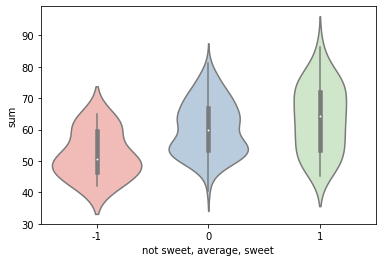

In [171]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Sweet', y='sum', data=sweet_original, palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

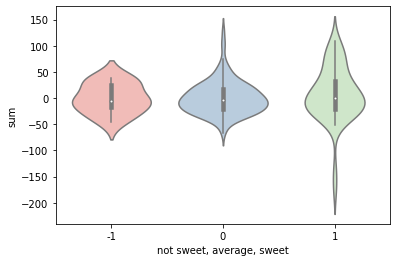

In [172]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Sweet', y='sum', data=sweet_cas_violin_df, palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

In [173]:
fruity_cas_violin_df_labeled = fruity_cas_violin_df.copy()
fruity_cas_violin_df_labeled['category_Fruity_label'] = fruity_cas_violin_df_labeled['category_Fruity'].replace({
    0: 'average flavor',
    1: 'flavor-specific',
    -1: 'not-flavor'
})

fruity_cas_violin_df_labeled = fruity_cas_violin_df_labeled.drop(columns=['category_Fruity'])

slope: 7.3762814833168635


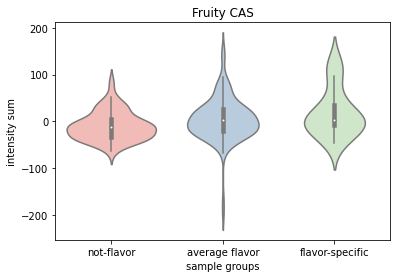

In [175]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Fruity_label', y='sum', data=fruity_cas_violin_df_labeled, palette="Pastel1", order=['not-flavor','average flavor', 'flavor-specific'])

# lines
medians = fruity_cas_violin_df_labeled.groupby("category_Fruity_label")["sum"].median()

x_vals = [0, len(medians)-1] 
y_vals = [medians.iloc[-1], medians.iloc[1]] 


#plt.plot(x_vals, y_vals, color='r', linestyle='--', label='Line through median of first and last violin')
#plt.plot([-0.75,2.75], [0,0], color='b', linestyle='--', label='Line through median of first and last violin')
print('slope: ' +str((y_vals[1]- y_vals[0]) / (x_vals[1] - x_vals[0])))

plt.title("Fruity CAS")
plt.ylabel("intensity sum")
plt.xlabel("sample groups")
plt.show()

In [176]:
medians

category_Fruity_label
average flavor      1.810788
flavor-specific     2.763977
not-flavor        -11.988586
Name: sum, dtype: float64

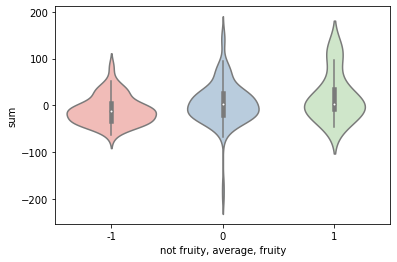

In [178]:
# looking at all cas number which were categories as sweet over all samples

sns.violinplot(x='category_Fruity', y='sum', data=fruity_cas_violin_df, palette="Pastel1")
plt.xlabel("not fruity, average, fruity")
plt.show()

In [179]:
woody_cas_violin_df_labeled = woody_cas_violin_df.copy()
woody_cas_violin_df_labeled['category_Woody_label'] = woody_cas_violin_df_labeled['category_Woody'].replace({
    0: 'average flavor',
    1: 'flavor-specific',
    -1: 'not-flavor'
})

woody_cas_violin_df_labeled = woody_cas_violin_df_labeled.drop(columns=['category_Woody'])

In [180]:
medians

category_Fruity_label
average flavor      1.810788
flavor-specific     2.763977
not-flavor        -11.988586
Name: sum, dtype: float64

slope: 16.133567396621288


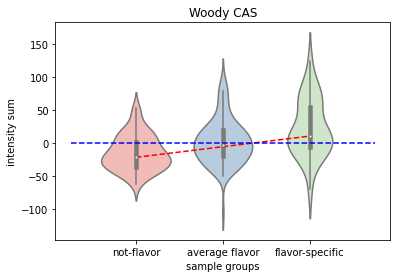

In [181]:
# looking at all cas number which were categories as woody over all samples
sns.violinplot(x='category_Woody_label', y='sum', data=woody_cas_violin_df_labeled, palette="Pastel1", order=['not-flavor','average flavor', 'flavor-specific'])

# lines
medians = woody_cas_violin_df_labeled.groupby("category_Woody_label")["sum"].median()

x_vals = [0, len(medians)-1] 
y_vals = [medians.iloc[-1], medians.iloc[1]] 


plt.plot(x_vals, y_vals, color='r', linestyle='--', label='Line through median of first and last violin')
plt.plot([-0.75,2.75], [0,0], color='b', linestyle='--', label='Line through median of first and last violin')
print('slope: ' +str((y_vals[1]- y_vals[0]) / (x_vals[1] - x_vals[0])))
plt.title("Woody CAS")
plt.ylabel("intensity sum")
plt.xlabel("sample groups")
plt.show()


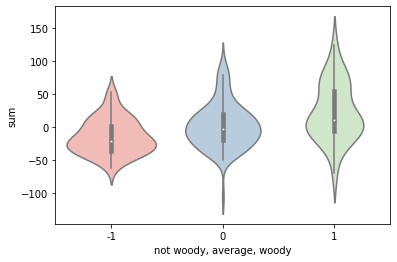

In [182]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Woody', y='sum', data=woody_cas_violin_df, palette="Pastel1")
plt.xlabel("not woody, average, woody")
plt.show()

#### looking at which cas numbers are significant and whcih are not

In [183]:
def plot_diff_exp_CAS(df,flavor):
    flavor_true = df[df["category_" + str(flavor)] == 1].index
    flavor_false = df[df["category_" + str(flavor)] == -1].index
    plt.figure(figsize=(50, 10))           
    plt.bar(df.loc[flavor_true].iloc[:,:-4].columns, df.loc[flavor_true].iloc[:,:-4].mean(axis=0), color='b', alpha=0.5)
    plt.bar(df.loc[flavor_false].iloc[:,:-4].columns, df.loc[flavor_false].iloc[:,:-4].mean(axis=0),color="g",  alpha=0.5)
    plt.xlabel('CAS numbers')
    plt.ylabel('intensities over all samples')
    plt.title('labeled CAS numbers x intensities over all samples ')
    legend_entries = [Line2D([0], [0], color='b', lw=4, label=str(flavor) + ' samples'),
                    Line2D([0], [0], color='g', lw=4, label='not ' +str(flavor) +' sweet samples')]
    plt.legend(handles=legend_entries)
    plt.show()


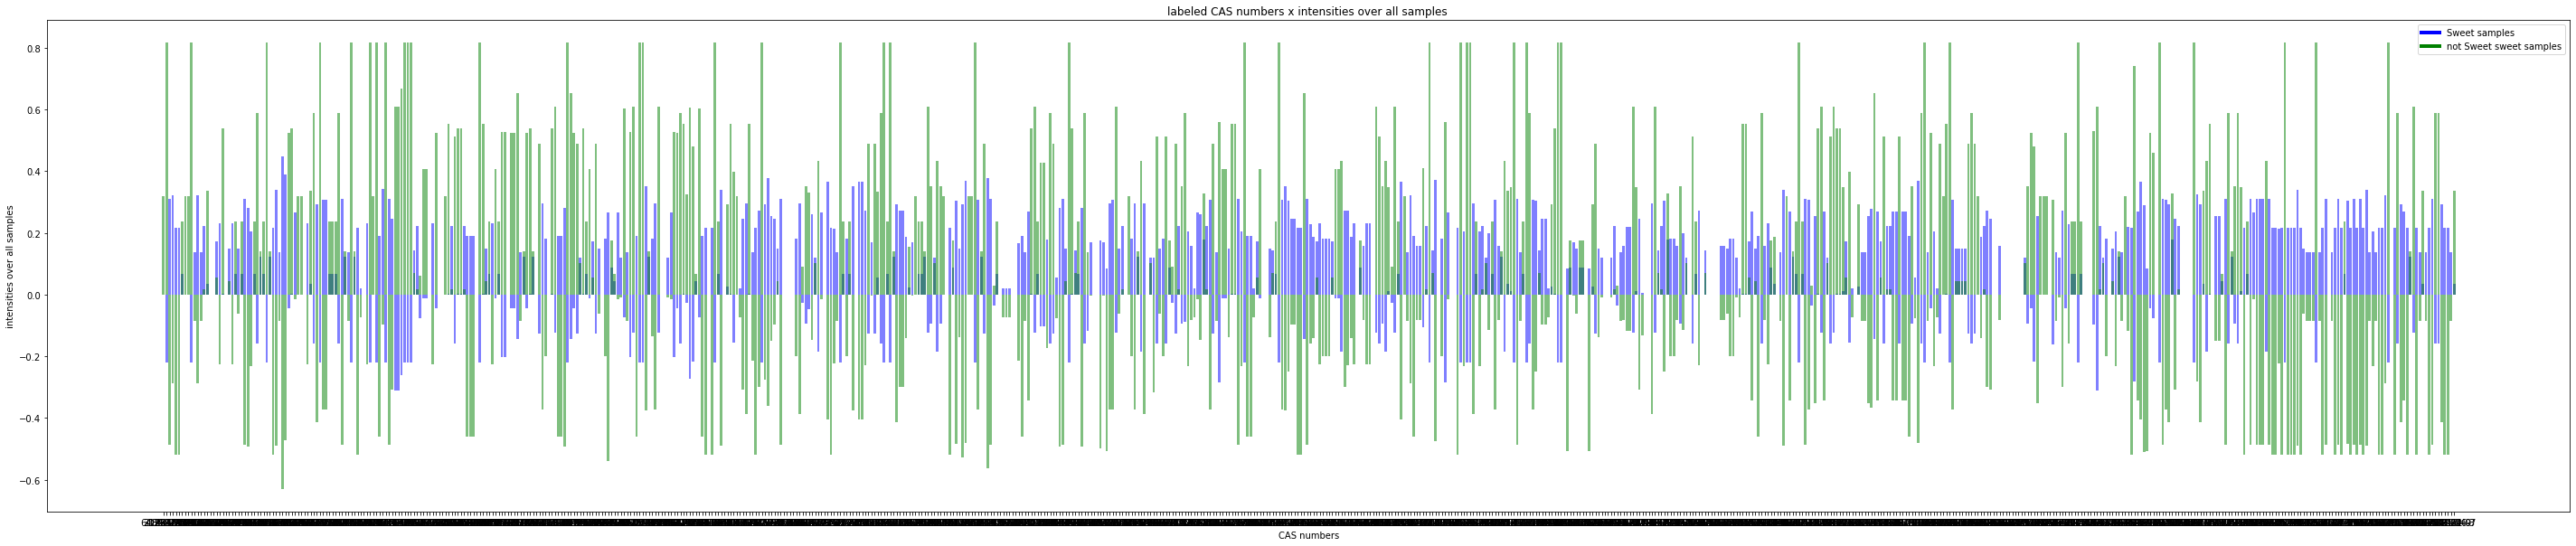

In [184]:
plot_diff_exp_CAS(violin_df,"Sweet")

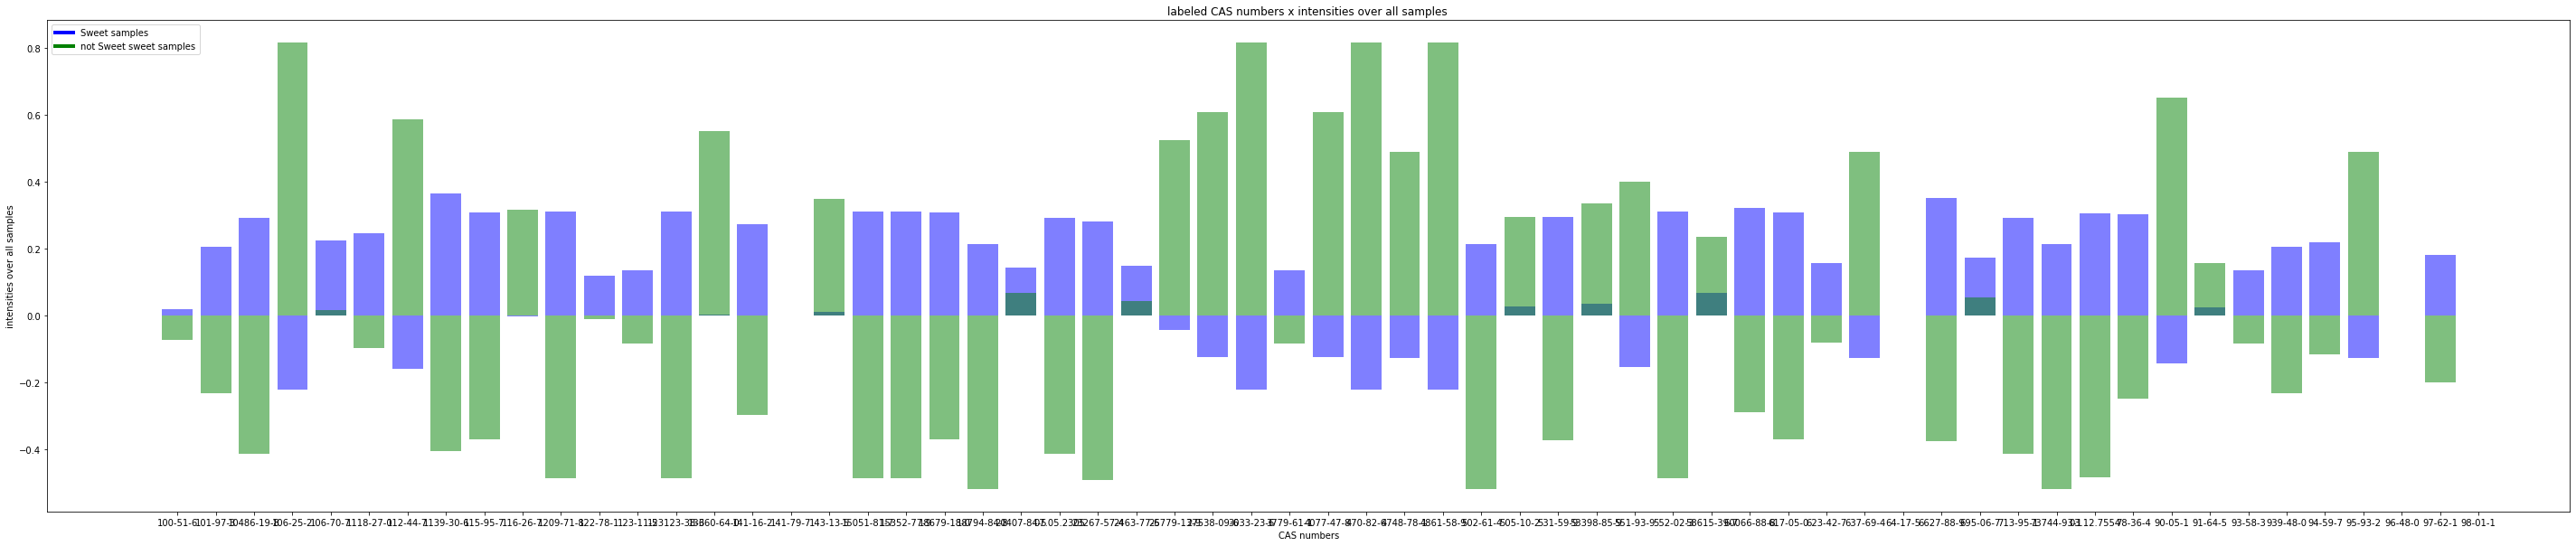

In [185]:
plot_diff_exp_CAS(sweet_cas_violin_df,"Sweet")

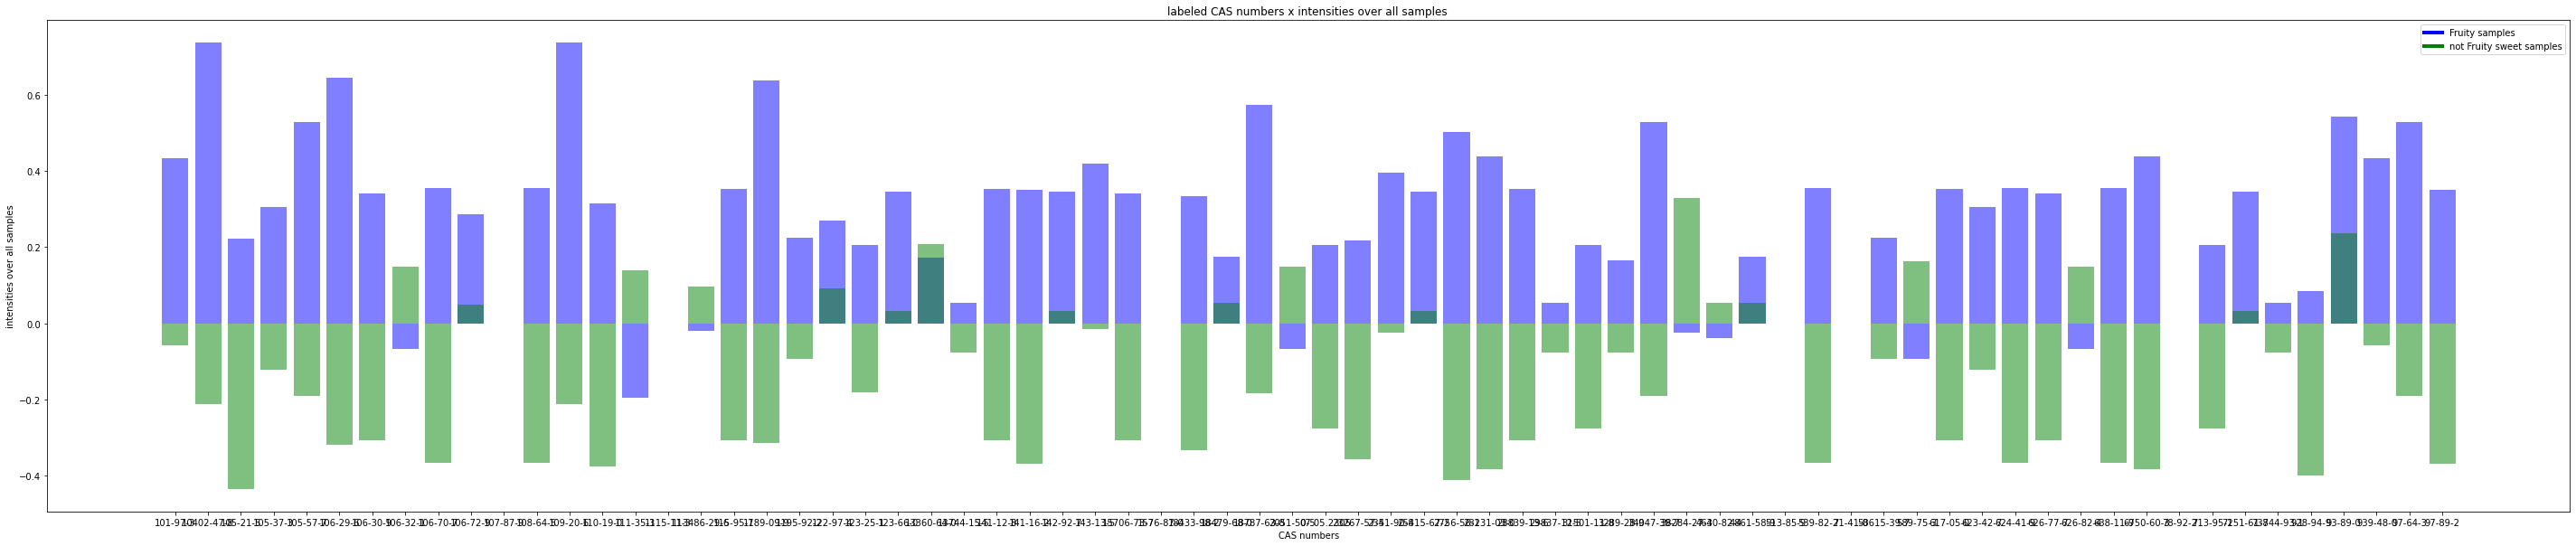

In [186]:
plot_diff_exp_CAS(fruity_cas_violin_df,"Fruity")

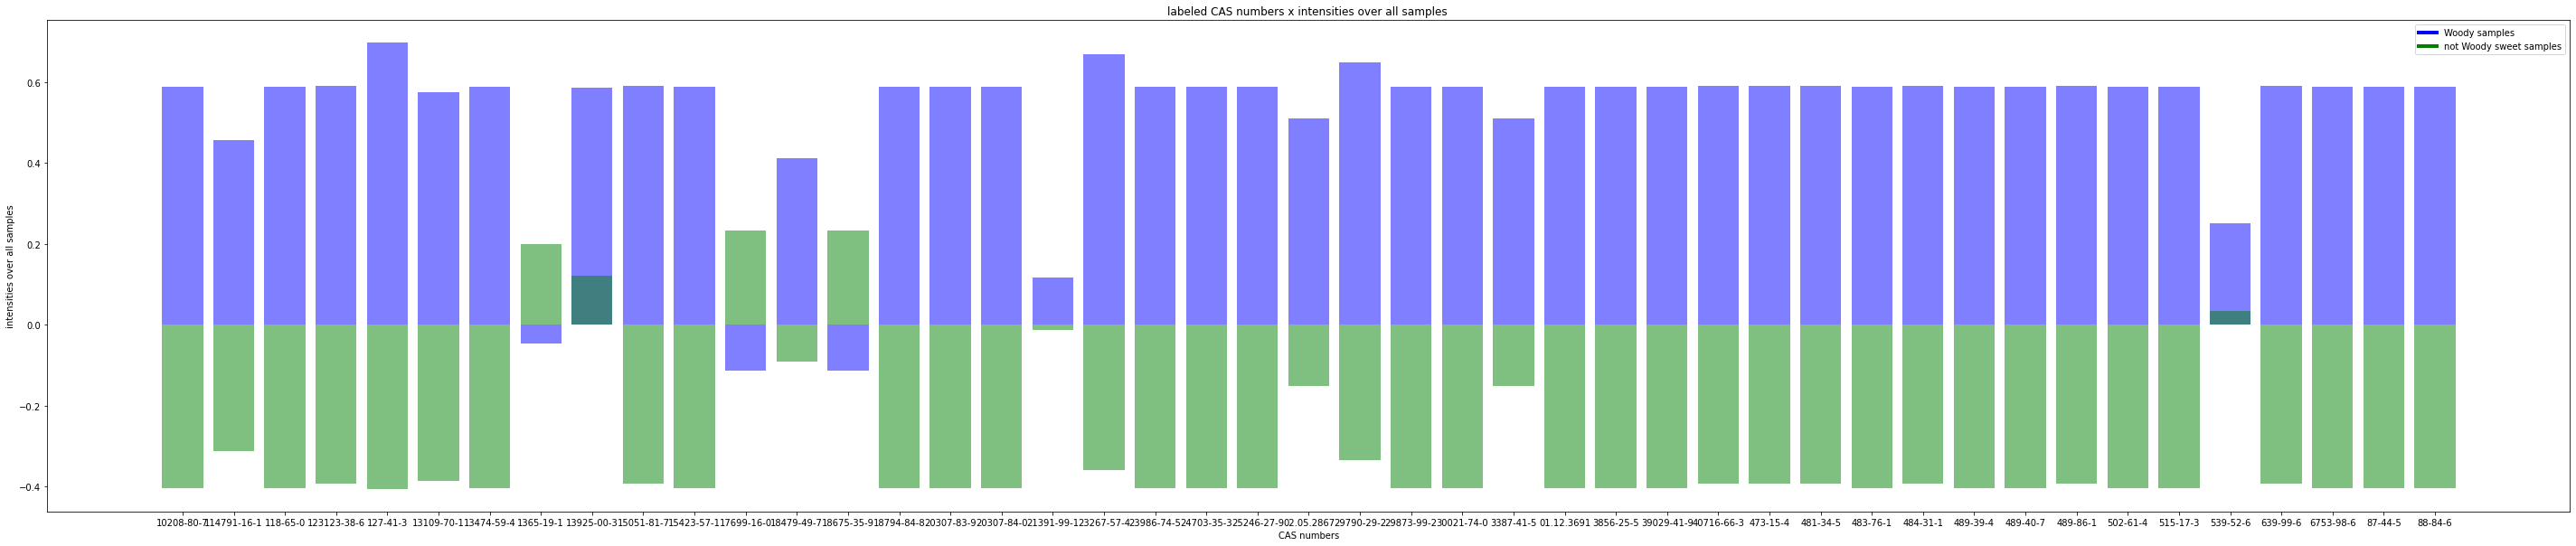

In [44]:
plot_diff_exp_CAS(woody_cas_violin_df,"Woody")

## T - Test
### checking difference of intensity for one CAS between different samples

In [45]:
flavor_true = violin_df[violin_df["category_Sweet"] == 1].index
flavor_false = violin_df[violin_df["category_Sweet"] == -1].index
t_stat, p_val = stats.ttest_ind(violin_df['10486-19-8'].loc[flavor_true], violin_df['10486-19-8'].loc[flavor_false])  
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))


t-statistic = 2.833593650809555
p-value = 0.008441770543734257


In [46]:
# positiv = significant
check_CAS(violin_df,'10486-19-8','Sweet')

1.237840354185071

### checking difference of intensity for all CAS between different samples

In [75]:
def check_significant_CAS(df, flavor):
    #check this for all Cas numbers that are available
    alpha = 0.05
    labels=[]
    p_values = []
    significant_CAS =[]
    flavor_true = df[df["category_"+ flavor] == 1].index
    flavor_false = df[df["category_"+flavor] == -1].index
    for CAS in df.iloc[:,:-4].columns:
        t_stat, p_val = stats.ttest_ind(df[CAS].loc[flavor_true], df[CAS].loc[flavor_false])  
        print("CAS: " +str(CAS))
        print("t-statistic = " + str(t_stat))  
        print("p-value = " + str(p_val))
        labels.append(CAS)
        p_values.append(p_val)
        if p_val < alpha:
            significant_CAS.append(CAS)
    return(labels, p_values, significant_CAS)

#### sweet

In [122]:
sweet_label, sweet_p_val, sweet_sig_CAS = check_significant_CAS(sweet_cas_violin_df, "Sweet")

CAS: 100-51-6
t-statistic = 1.4154880160353753
p-value = 0.16795274558605688
CAS: 101-97-3
t-statistic = 2.0138004937797604
p-value = 0.053730543063722144
CAS: 10486-19-8
t-statistic = 2.833593650809555
p-value = 0.008441770543734257
CAS: 106-25-2
t-statistic = -2.9193900940157467
p-value = 0.006850293038333887
CAS: 106-70-7
t-statistic = 1.45846648140831
p-value = 0.15583910502487128
CAS: 1118-27-0
t-statistic = 2.103023496767383
p-value = 0.04457727765633417
CAS: 112-44-7
t-statistic = -2.3947252488936455
p-value = 0.023567727700088494
CAS: 1139-30-6
t-statistic = 2.7899282249943957
p-value = 0.009379835518298787
CAS: 115-95-7
t-statistic = 2.72963263445139
p-value = 0.010837033457220974
CAS: 116-26-7
t-statistic = -0.050464770815732994
p-value = 0.9601103082697512
CAS: 1209-71-8
t-statistic = 3.355070195089883
p-value = 0.0022929480247153747
CAS: 122-78-1
t-statistic = 1.2096690719041392
p-value = 0.23652044882819417
CAS: 123-11-5
t-statistic = 1.9726793114241865
p-value = 0.0584799

In [123]:
len(sweet_sig_CAS)/len(sweet_cas_violin_df.iloc[:,:-4].columns)

0.5081967213114754

In [124]:
len(sweet_sig_CAS)

31

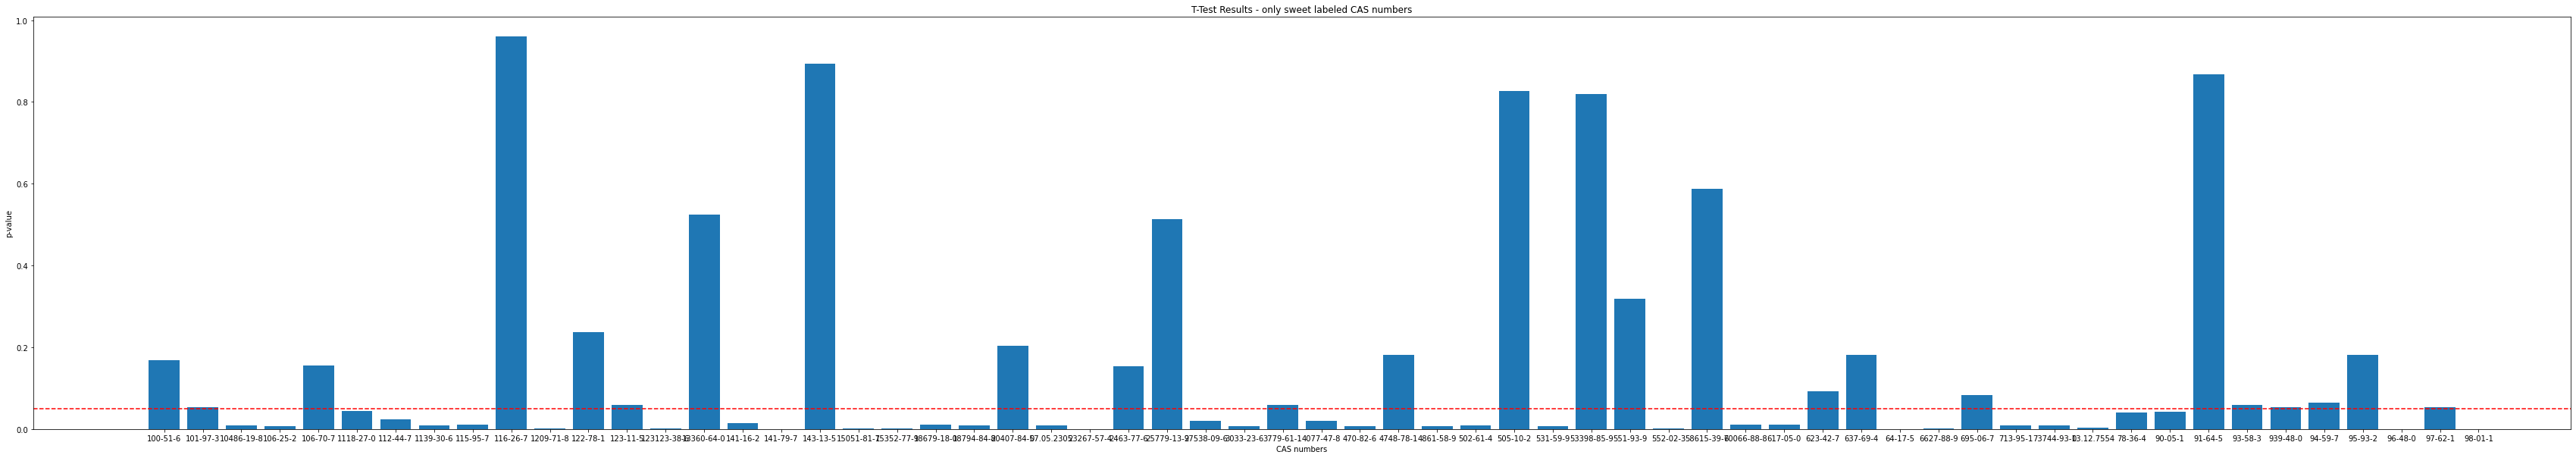

In [125]:
# bar chart of p values
alpha = 0.05
plt.figure(figsize=(60, 10))           
plt.bar(sweet_label, sweet_p_val)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('CAS numbers')
plt.ylabel('p-value')
plt.title('T-Test Results - only sweet labeled CAS numbers')
plt.show()


### fruit 

In [187]:
fruity_label, fruity_p_val, fruity_sig_CAS = check_significant_CAS(fruity_cas_violin_df,'Fruity')

CAS: 101-97-3
t-statistic = 1.7114698116152354
p-value = 0.09207513029987129
CAS: 10402-47-8
t-statistic = 3.160969621191513
p-value = 0.0024487635019783396
CAS: 105-21-5
t-statistic = 2.84688772668454
p-value = 0.006006757267224238
CAS: 105-37-3
t-statistic = 1.9267091034215695
p-value = 0.0586778526236786
CAS: 105-57-7
t-statistic = 3.3343270668733056
p-value = 0.0014581245322656468
CAS: 106-29-6
t-statistic = 3.102650297670425
p-value = 0.002904826402504532
CAS: 106-30-9
t-statistic = 3.114672058976527
p-value = 0.0028047643799591314
CAS: 106-32-1
t-statistic = -1.113255722768501
p-value = 0.2699663147219303
CAS: 106-70-7
t-statistic = 3.249297839465868
p-value = 0.0018840346817709582
CAS: 106-72-9
t-statistic = 1.1173762282203932
p-value = 0.2682151435690061
CAS: 107-87-9
t-statistic = nan
p-value = nan
CAS: 108-64-5
t-statistic = 3.249297839465868
p-value = 0.0018840346817709582
CAS: 109-20-6
t-statistic = 3.160969621191513
p-value = 0.0024487635019783396
CAS: 110-19-0
t-statistic

In [188]:
len(fruity_sig_CAS)/len(fruity_label)

0.42857142857142855

In [189]:
len(fruity_sig_CAS)

30

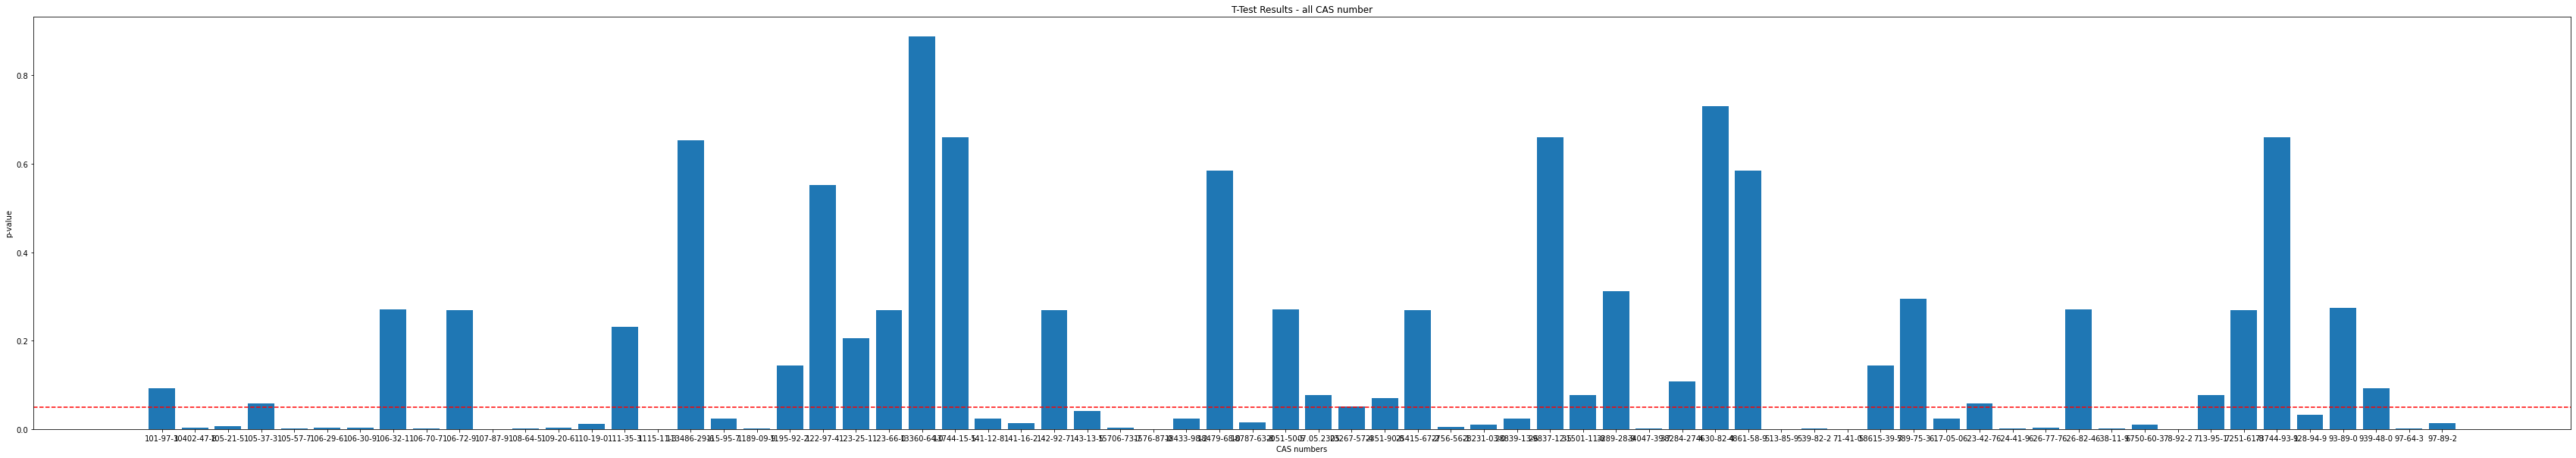

In [195]:
# bar chart of p values
plt.figure(figsize=(60, 10))           
plt.bar(fruity_label, fruity_p_val)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('CAS numbers')
plt.ylabel('p-value')
plt.title('T-Test Results - all CAS number')

plt.show()


### wood 

In [132]:
woody_label, woody_p_val, woody_sig_CAS = check_significant_CAS(woody_cas_violin_df,'Woody')

CAS: 10208-80-7
t-statistic = 4.409744752888906
p-value = 3.5516881348009273e-05
CAS: 114791-16-1
t-statistic = 3.4331876260598615
p-value = 0.0009926251735871252
CAS: 118-65-0
t-statistic = 4.409744752888906
p-value = 3.5516881348009273e-05
CAS: 123123-38-6
t-statistic = 4.316062683326957
p-value = 4.982222815240006e-05
CAS: 127-41-3
t-statistic = 4.331892651008007
p-value = 4.7064843443130383e-05
CAS: 13109-70-1
t-statistic = 4.352178891809698
p-value = 4.374646729245862e-05
CAS: 13474-59-4
t-statistic = 4.409744752888906
p-value = 3.5516881348009273e-05
CAS: 1365-19-1
t-statistic = -1.1103047085005902
p-value = 0.2705621065811855
CAS: 13925-00-3
t-statistic = 1.812536248394417
p-value = 0.07407225626696405
CAS: 15051-81-7
t-statistic = 4.316062683326957
p-value = 4.982222815240006e-05
CAS: 15423-57-1
t-statistic = 4.409744752888906
p-value = 3.5516881348009273e-05
CAS: 17699-16-0
t-statistic = -1.6315710089894766
p-value = 0.10713657403359574
CAS: 18479-49-7
t-statistic = 2.32281555

In [134]:
len(woody_sig_CAS)/len(woody_label)


0.8666666666666667

In [135]:
len(woody_sig_CAS)

39

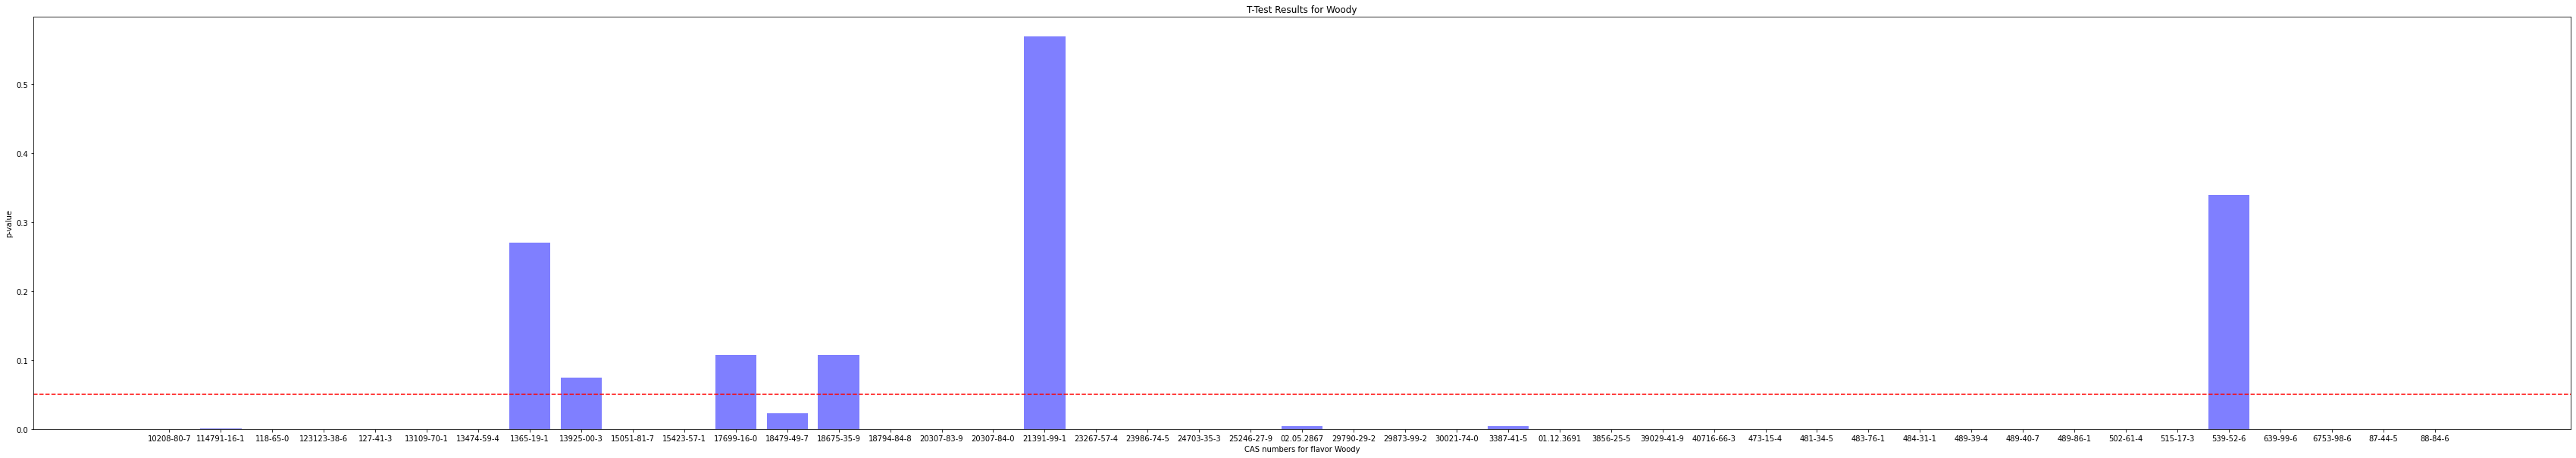

In [287]:
# bar chart of p values
plt.figure(figsize=(60, 10))           
plt.bar(woody_label, woody_p_val, color='b', alpha=0.5)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('CAS numbers for flavor Woody')
plt.ylabel('p-value')
plt.title('T-Test Results for Woody')

plt.show()


#### all CAS numbers regardless the lable
=> Don't really make sense to compare with other CAS number which are not labeled sweet since they still can have a high intensity but correspond to different flavors

#### sweet

In [119]:
label_all_sweet,p_val_all_sweet, significant_CAS_all_sweet = check_significant_CAS(violin_df,'Sweet')

CAS: 6485-40-1
t-statistic = -0.050464770815732994
p-value = 0.9601103082697512
CAS: 3033-23-6
t-statistic = -2.9193900940157467
p-value = 0.006850293038333887
CAS: 21284-22-0
t-statistic = 3.355070195089883
p-value = 0.0022929480247153747
CAS: 38427-78-0
t-statistic = 2.7526269410773825
p-value = 0.01025792329229887
CAS: 495-61-4
t-statistic = 2.8341963416196574
p-value = 0.008429463618111862
CAS: 29873-99-2
t-statistic = 2.8341963416196574
p-value = 0.008429463618111862
CAS: 6909-30-4
t-statistic = 0.5483207982212652
p-value = 0.5878172256540105
CAS: 99-49-0
t-statistic = -0.050464770815732994
p-value = 0.9601103082697512
CAS: 2244-16-8
t-statistic = -0.050464770815732994
p-value = 0.9601103082697512
CAS: 876-17-5
t-statistic = -2.9193900940157467
p-value = 0.006850293038333887
CAS: 5989-27-5
t-statistic = 1.9726793114241865
p-value = 0.05847994891222125
CAS: 4674-50-4
t-statistic = 2.7526269410773825
p-value = 0.01025792329229887
CAS: 2243-33-6
t-statistic = 1.9726793114241865
p-val

CAS: 5273-85-8
t-statistic = 4.0012978134167145
p-value = 0.00041874716795910454
CAS: 5932-68-3
t-statistic = 2.0138004937797604
p-value = 0.053730543063722144
CAS: 4959-35-7
t-statistic = 0.5483207982212652
p-value = 0.5878172256540105
CAS: 34995-77-2
t-statistic = -2.3947252488936455
p-value = 0.023567727700088494
CAS: 39638-67-0
t-statistic = 0.9459415473403323
p-value = 0.3522707445321064
CAS: 7212-40-0
t-statistic = 0.5483207982212652
p-value = 0.5878172256540105
CAS: 07.11.5258
t-statistic = -2.9193900940157467
p-value = 0.006850293038333887
CAS: 80041-01-6
t-statistic = 0.9459415473403323
p-value = 0.3522707445321064
CAS: 13474-59-4
t-statistic = 2.8341963416196574
p-value = 0.008429463618111862
CAS: 23726-91-2
t-statistic = 3.0637963018686776
p-value = 0.0047943122922487515
CAS: 3779-61-1
t-statistic = 1.9726793114241865
p-value = 0.05847994891222125
CAS: 4128-17-0
t-statistic = 4.385989927912423
p-value = 0.000148161498550692
CAS: 1117-52-8
t-statistic = 3.3265151796999968
p-v

In [121]:
print(len(significant_CAS_all_sweet))
print(len(significant_CAS_all_sweet)/len(label_all_sweet))

271
0.3702185792349727


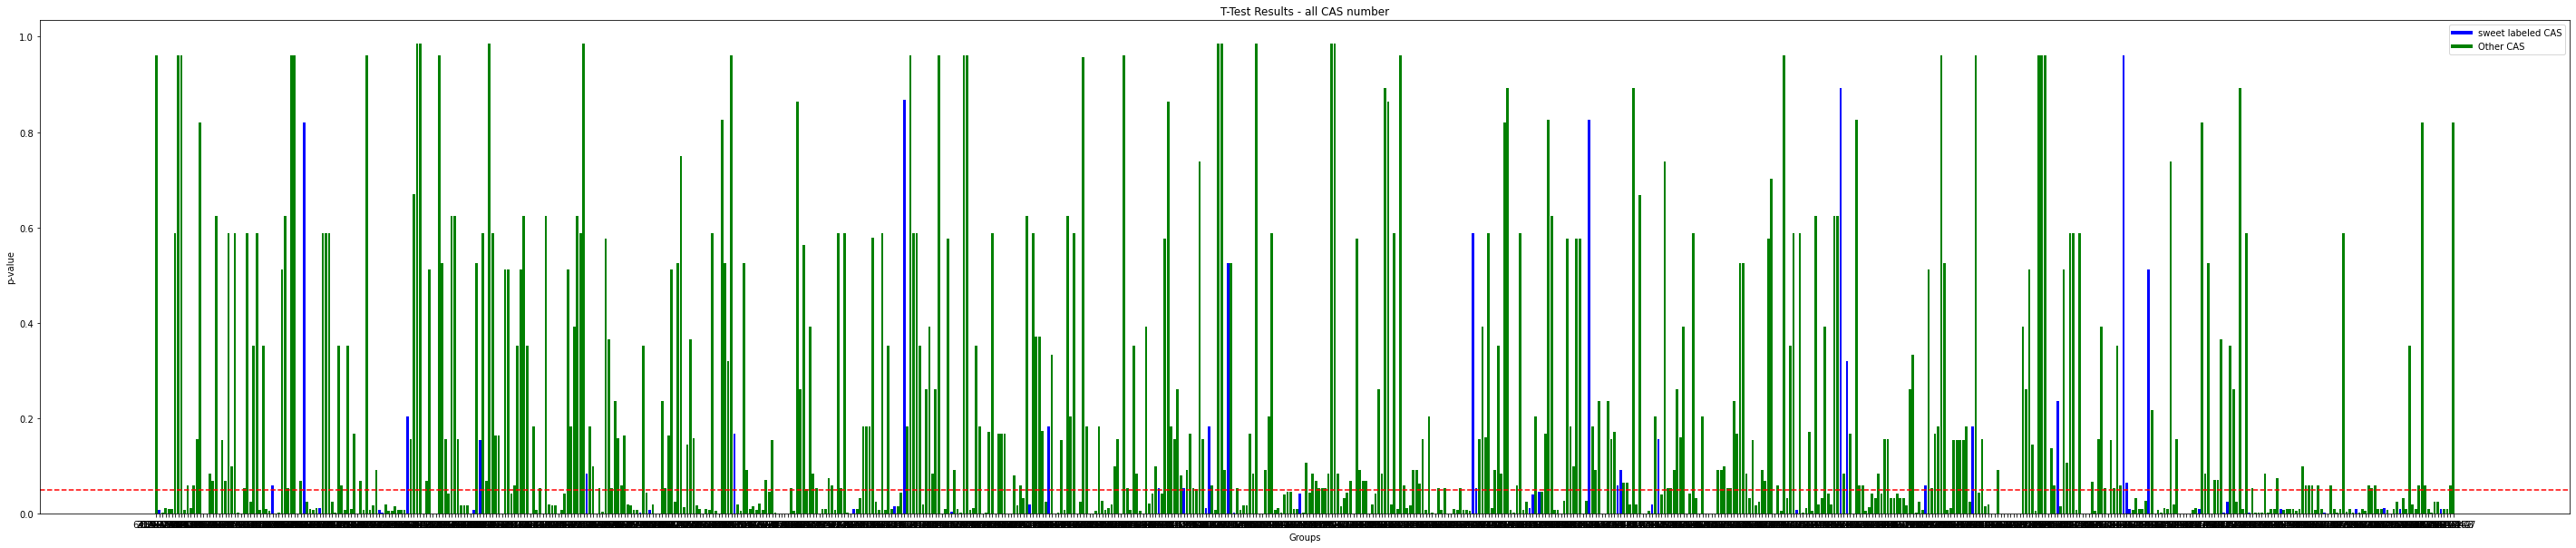

In [302]:
# bar chart of p values
plt.figure(figsize=(50, 10))           
colors = ['b' if x in sweet_descriptors_CAS else 'g' for x in label_all]
plt.bar(label_all, p_val_all, color=colors)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('Groups')
plt.ylabel('p-value')
plt.title('T-Test Results - all CAS number')
legend_entries = [Line2D([0], [0], color='b', lw=4, label='sweet labeled CAS'),
                  Line2D([0], [0], color='g', lw=4, label='Other CAS')]
plt.legend(handles=legend_entries)

plt.show()


#### woody

In [82]:
label_all_woody,p_val_all_woody, significant_CAS_all_woody = check_significant_CAS(violin_df,'Woody')


CAS: 6485-40-1
t-statistic = 0.9604404745373745
p-value = 0.34004792476509726
CAS: 3033-23-6
t-statistic = -1.6315710089894766
p-value = 0.10713657403359574
CAS: 21284-22-0
t-statistic = 4.316062683326957
p-value = 4.982222815240006e-05
CAS: 38427-78-0
t-statistic = 4.682912437704169
p-value = 1.297737236395859e-05
CAS: 495-61-4
t-statistic = 4.409744752888906
p-value = 3.5516881348009273e-05
CAS: 29873-99-2
t-statistic = 4.409744752888906
p-value = 3.5516881348009273e-05
CAS: 6909-30-4
t-statistic = 2.4267527178143
p-value = 0.01773898603180319
CAS: 99-49-0
t-statistic = 0.9604404745373745
p-value = 0.34004792476509726
CAS: 2244-16-8
t-statistic = 0.9604404745373745
p-value = 0.34004792476509726
CAS: 876-17-5
t-statistic = -1.6315710089894766
p-value = 0.10713657403359574
CAS: 5989-27-5
t-statistic = 2.965678608924413
p-value = 0.004094832305903568
CAS: 4674-50-4
t-statistic = 4.682912437704169
p-value = 1.297737236395859e-05
CAS: 2243-33-6
t-statistic = 2.965678608924413
p-value = 0.

In [83]:
print(len(significant_CAS_all_woody))
print(len(significant_CAS_all_woody)/len(label_all_woody))

410
0.5601092896174863


#### fruity

In [191]:
label_all_fruity,p_val_all_fruity, significant_CAS_all_fruity = check_significant_CAS(violin_df,'Fruity')


CAS: 6485-40-1
t-statistic = 1.1050865605855271
p-value = 0.27346184246994165
CAS: 3033-23-6
t-statistic = 0.5487958836894528
p-value = 0.585148756086015
CAS: 21284-22-0
t-statistic = 3.1395902876568007
p-value = 0.002607543898478713
CAS: 38427-78-0
t-statistic = 2.514598337977609
p-value = 0.014569520241508102
CAS: 495-61-4
t-statistic = 0.4425558031343979
p-value = 0.6596523770496985
CAS: 29873-99-2
t-statistic = 0.4425558031343979
p-value = 0.6596523770496985
CAS: 6909-30-4
t-statistic = 1.480468416073915
p-value = 0.14389505819804788
CAS: 99-49-0
t-statistic = 1.1050865605855271
p-value = 0.27346184246994165
CAS: 2244-16-8
t-statistic = 1.1050865605855271
p-value = 0.27346184246994165
CAS: 876-17-5
t-statistic = 0.5487958836894528
p-value = 0.585148756086015
CAS: 5989-27-5
t-statistic = 0.5988696957197039
p-value = 0.5514773746091783
CAS: 4674-50-4
t-statistic = 2.514598337977609
p-value = 0.014569520241508102
CAS: 2243-33-6
t-statistic = 0.5988696957197039
p-value = 0.551477374609

In [192]:
print(len(significant_CAS_all_fruity))
print(len(significant_CAS_all_fruity)/len(label_all_fruity))

236
0.3224043715846995


In [193]:
#SUMMARY: 
print('significant molecules')
print("FN Sweet: " + str(len(sweet_sig_CAS)))
print("all Sweet: " + str(len(significant_CAS_all_sweet)))
print("FN Fruity: " + str(len(fruity_sig_CAS)))
print("all Fruity: " + str(len(significant_CAS_all_fruity)))
print("FN Woody: " + str(len(woody_sig_CAS)))
print("all Woody: " + str(len(significant_CAS_all_woody)))

significant molecules
FN Sweet: 31
all Sweet: 271
FN Fruity: 30
all Fruity: 236
FN Woody: 39
all Woody: 410


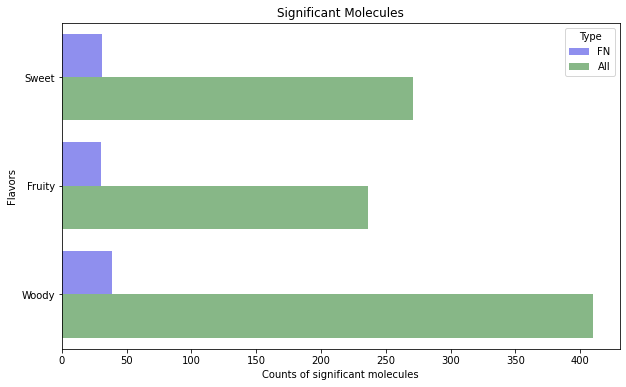

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
categories = ['Sweet', 'Fruity', 'Woody']
counts_FN = [len(sweet_sig_CAS), len(fruity_sig_CAS), len(woody_sig_CAS)]
counts_All = [len(significant_CAS_all_sweet), len(significant_CAS_all_fruity), len(significant_CAS_all_woody)]

# Create a DataFrame
import pandas as pd
df = pd.DataFrame({'Category': categories + categories, 
                   'Counts': counts_FN + counts_All, 
                   'Type': ['FN']*len(categories) + ['All']*len(categories)})

# Create the grouped bar plot (horizontal)
plt.figure(figsize=(10, 6))
sns.barplot(y='Category', x='Counts', hue='Type', data=df, palette={'FN': 'b', 'All': 'g'}, alpha=0.5)

# Add labels and title
plt.ylabel('Flavors')
plt.xlabel('Counts of significant molecules')
plt.title('Significant Molecules')

# Show the plot
plt.show()


### Predictive Models 
#### Linear Regression

In [196]:
from scipy.optimize import leastsq

def find_best_params(x, y):
    x=np.nan_to_num(x)
    def score( p, x,y):
        prediction = np.dot(x,p)
        #print(prediction)
        #print(np.sum(np.abs(prediction-y)))
        return np.hstack((prediction-y,p))
    
    p0=np.ones(np.shape(x)[1])
    p1 = leastsq(score, p0,(x,y),epsfcn=1)[0]
    
    prediction = np.dot(p1,x.T)
    return(p1,prediction)

In [ ]:
#saved = ms_data_comp.copy()

In [244]:
ms_data_comp= (data.drop(columns= 'replicate'))


In [245]:
ms_data_comp = ms_data_comp.loc[valid_indexes]
ms_data_comp = ms_data_comp.apply(lambda col:col/col.median(),axis=0)

In [226]:
p_sweet, prediction_sweet= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Sweet']))
p_fruity,prediction_fruity= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Fruity']))
p_woody,prediction_woody= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Woody']))
p_malt,prediction_malt= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Malt']))
p_floral, prediction_floral= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Floral']))
p_peaty, prediction_peaty= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Peaty']))
p_driedfruits,prediction_dried_fruits= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Dried_fruits']))
p_complex,prediction_complexity= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Complexity']))
p_aftertaste, prediction_aftertaste= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Aftertaste']))


In [41]:
all_p = np.append(np.append(np.append(np.append(np.append(np.append(np.append( p_sweet , p_fruity), p_woody), p_malt), p_peaty), p_driedfruits), p_complex),p_aftertaste )

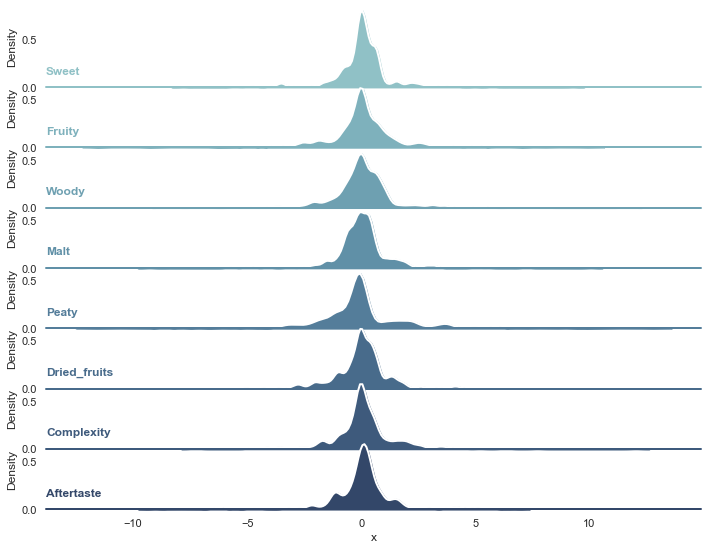

In [412]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
test = dict(x = all_p, g = (["Sweet"]* 732+ ["Fruity"]*732+ ["Woody"]*732+ ["Malt"]*732+ ["Peaty"]*732+ ["Dried_fruits"]*732 + ["Complexity"]*732+ ["Aftertaste"]*732))
df = pd.DataFrame(test)

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=10, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
#g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [304]:
def show_correlation_pred(prediction,y,flavor):
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    
    b= plt.hist(y,5, color ='lightgreen', alpha = 0.5)[1]
    plt.hist(prediction, bins=b,alpha=0.5, color ='orange')
    
    labels= ["reference","prediction"]
    plt.legend(labels)

    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    plt.plot(prediction,y,"o", color='b', alpha =0.5)
    
    plt.title("Correlation: "+ str(np.corrcoef(np.array(prediction), y)[0,1]))

    plt.legend()
    plt.suptitle(flavor)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


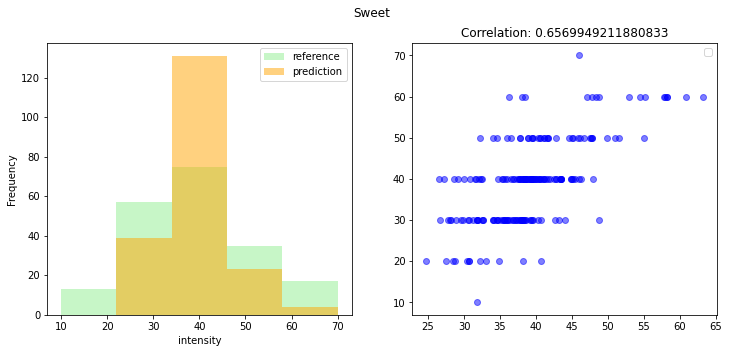

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


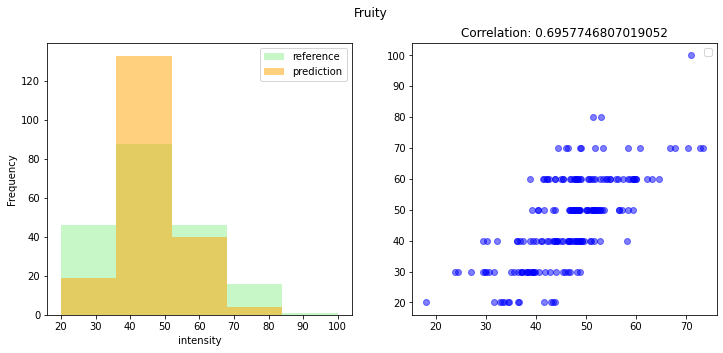

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


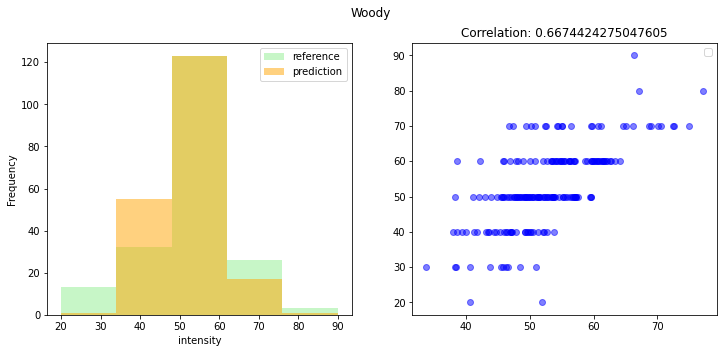

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


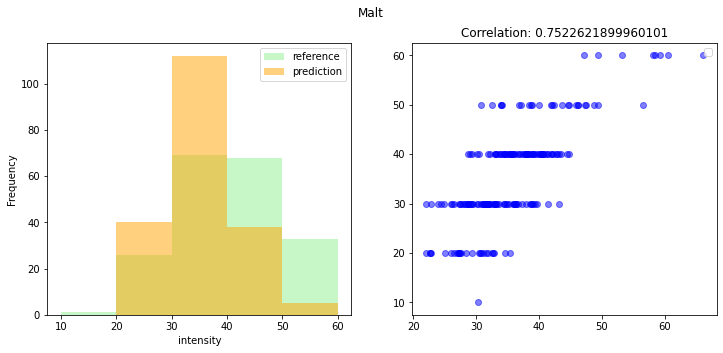

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


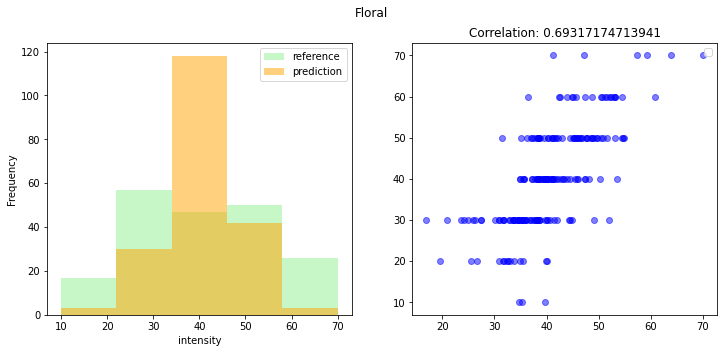

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


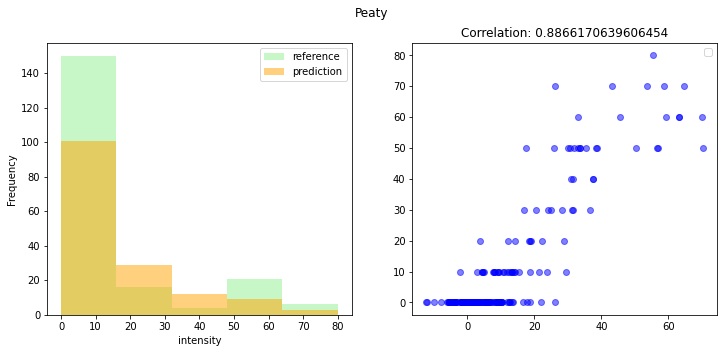

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


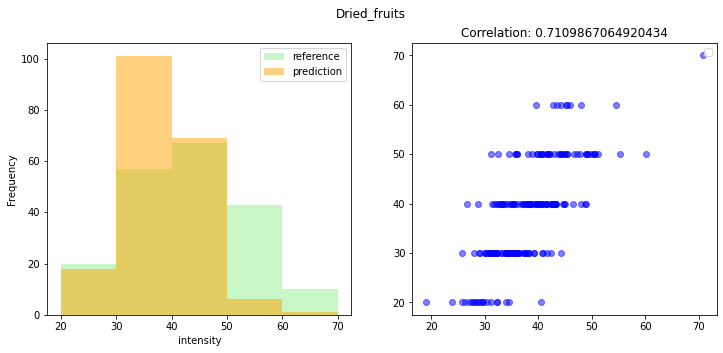

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


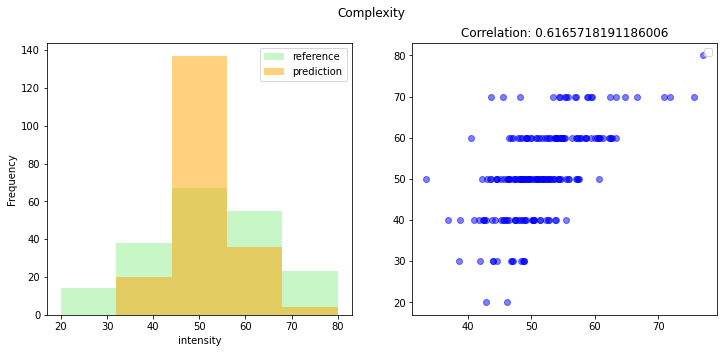

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


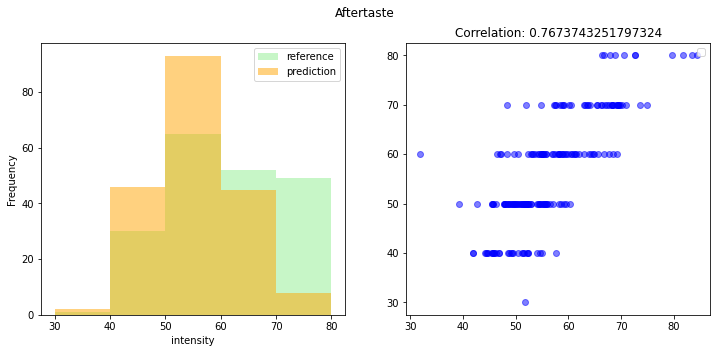

In [305]:
show_correlation_pred(prediction_sweet,np.array(panelist_data_comp['Sweet']),"Sweet")
show_correlation_pred(prediction_fruity,np.array(panelist_data_comp['Fruity']),"Fruity")
show_correlation_pred(prediction_woody,np.array(panelist_data_comp['Woody']),"Woody")
show_correlation_pred(prediction_malt,np.array(panelist_data_comp['Malt']),"Malt")
show_correlation_pred(prediction_floral,np.array(panelist_data_comp['Floral']),"Floral")
show_correlation_pred(prediction_peaty,np.array(panelist_data_comp['Peaty']),"Peaty")
show_correlation_pred(prediction_dried_fruits,np.array(panelist_data_comp['Dried_fruits']),"Dried_fruits")
show_correlation_pred(prediction_complexity,np.array(panelist_data_comp['Complexity']),"Complexity")
show_correlation_pred(prediction_aftertaste,np.array(panelist_data_comp['Aftertaste']),"Aftertaste")

#### Flavornet labeled molecules (Sweet, fruity, woody)

In [277]:
fn_sweet_df = ms_data_comp[sweet_descriptors_CAS]
fn_fruity_df = ms_data_comp[fruit_descriptors_CAS]
fn_woody_df = ms_data_comp[wood_descriptors_CAS]

In [278]:
p_sweet_fn, prediction_sweet_fn = find_best_params(np.array( fn_sweet_df),np.array(panelist_data_comp['Sweet']))
p_fruity_fn, prediction_fruity_fn = find_best_params(np.array( fn_fruity_df),np.array(panelist_data_comp['Fruity']))
p_woody_fn, prediction_woody_fn = find_best_params(np.array( fn_woody_df ),np.array(panelist_data_comp['Woody']))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


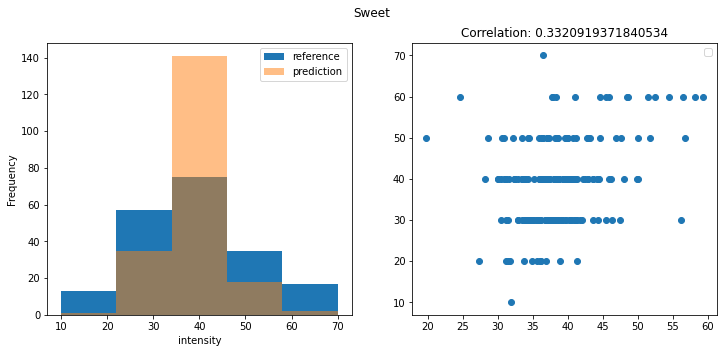

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


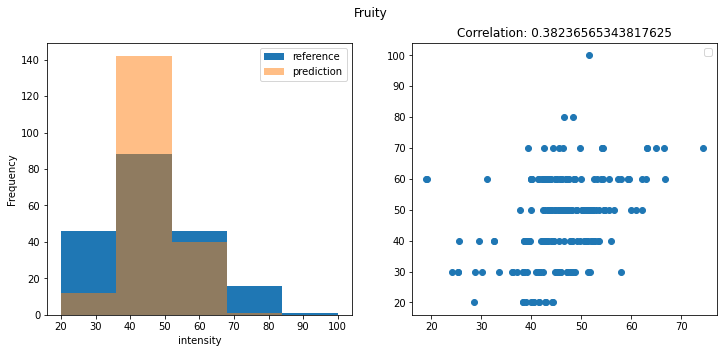

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


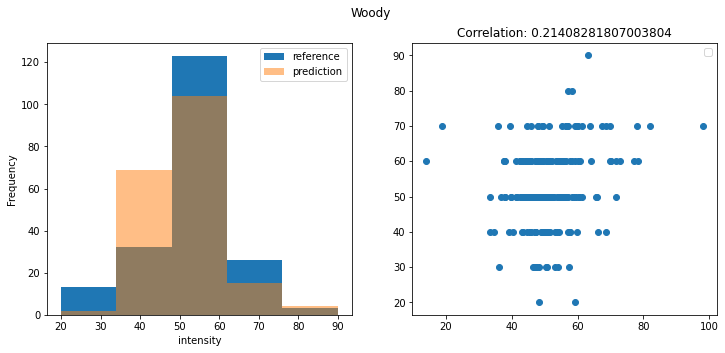

In [279]:
show_correlation_pred(prediction_sweet_fn,np.array(panelist_data_comp['Sweet']),"Sweet")
show_correlation_pred(prediction_fruity_fn,np.array(panelist_data_comp['Fruity']),"Fruity")
show_correlation_pred(prediction_woody_fn,np.array(panelist_data_comp['Woody']),"Woody")


### new labeled molecules

In [260]:
#SUMMARY: 
print('significant molecules')
print("FN Sweet: " + str(len(sweet_sig_CAS)))
print("all Sweet: " + str(len(significant_CAS_all_sweet)))
print("FN Fruity: " + str(len(fruity_sig_CAS)))
print("all Fruity: " + str(len(significant_CAS_all_fruity)))
print("FN Woody: " + str(len(woody_sig_CAS)))
print("all Woody: " + str(len(significant_CAS_all_woody)))

significant molecules
FN Sweet: 31
all Sweet: 271
FN Fruity: 30
all Fruity: 236
FN Woody: 39
all Woody: 410


In [263]:
new_sweet_df = ms_data_comp[significant_CAS_all_sweet]
new_fruity_df = ms_data_comp[significant_CAS_all_fruity]
new_woody_df = ms_data_comp[significant_CAS_all_woody]

In [264]:
p_sweet_new, prediction_sweet_new = find_best_params(np.array( new_sweet_df ),np.array(panelist_data_comp['Sweet']))
p_fruity_new, prediction_fruity_new = find_best_params(np.array( new_fruity_df),np.array(panelist_data_comp['Fruity']))
p_woody_new, prediction_woody_new = find_best_params(np.array( new_woody_df ),np.array(panelist_data_comp['Woody']))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


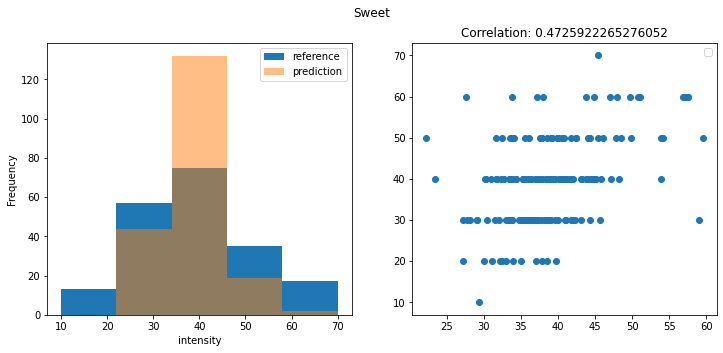

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


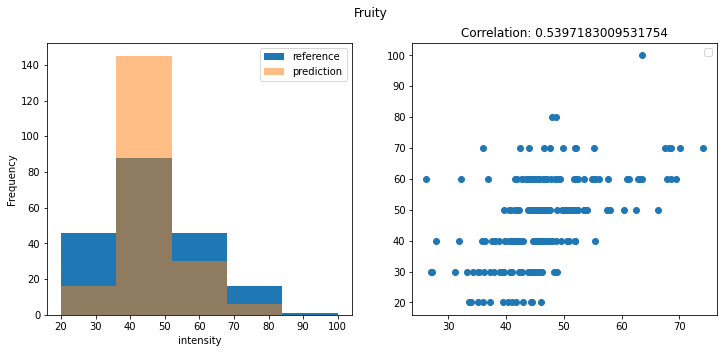

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


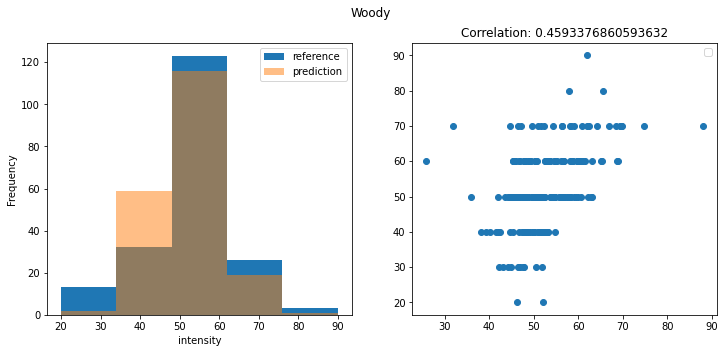

In [265]:
show_correlation_pred(prediction_sweet_new,np.array(panelist_data_comp['Sweet']),"Sweet")
show_correlation_pred(prediction_fruity_new,np.array(panelist_data_comp['Fruity']),"Fruity")
show_correlation_pred(prediction_woody_new,np.array(panelist_data_comp['Woody']),"Woody")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


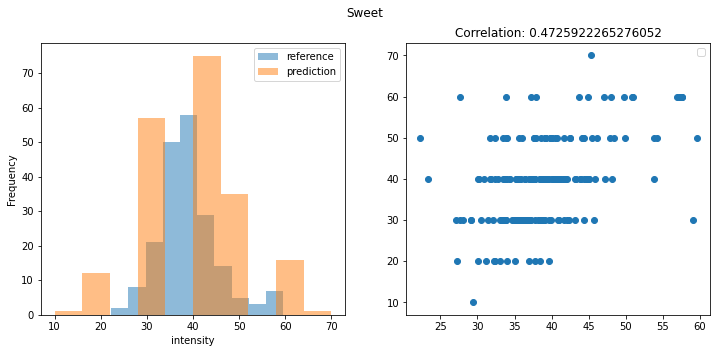

In [274]:
plt.figure(figsize=(12,5))
    
plt.subplot(1,2,1)
    
plt.hist(prediction_sweet_new,alpha=0.5)
plt.hist(np.array(panelist_data_comp['Sweet']),alpha=0.5)
    
labels= ["reference","prediction"]
plt.legend(labels)

plt.xlabel('intensity')
plt.ylabel('Frequency')
    
plt.subplot(1,2,2)
plt.plot(prediction_sweet_new,np.array(panelist_data_comp['Sweet']),"o")
    
plt.title("Correlation: "+ str(np.corrcoef(np.array(prediction_sweet_new), np.array(panelist_data_comp['Sweet']))[0,1]))

plt.legend()
plt.suptitle(flavor)
plt.show()